In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
df = pd.read_csv('data/ex1data2.txt', header=None, usecols=[0,1,2])
X1 = df.values[:, 0:1]
X2 = df.values[:, 1:2]
Y = df.values[:, 2:3]

meanX1 = np.mean(X1)
meanX2 = np.mean(X2)
meanY = np.mean(Y)

X1 = X1/meanX1
X2 = X2/meanX2
Y = Y/meanY

nX = np.c_[np.ones(Y.size), X1, X2]

In [3]:
#1.Cost Function 
def computeCost(X, y, theta=[[0],[0],[0]]):
    m = y.size
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

In [4]:
computeCost(nX, Y)

0.5660261243193423

In [5]:
#2.Gradient Descent
def gradientDescent(X, Y, theta=[[0],[0],[0]], alpha=0.01, num_iters=1500):
    m = Y.size
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-Y))
        J_history[i] = computeCost(X, Y, theta)
    return(theta, J_history)

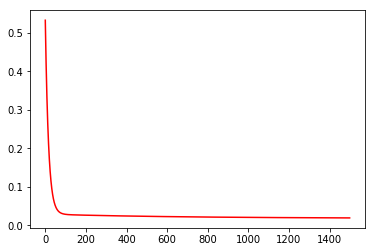

In [6]:
#3. Calculate Optimized Theta
(theta, J) = gradientDescent(nX, Y)
plt.plot(J, c='red')

In [7]:
#4. Prediction - price prediction for a 1650-square-foot house with 3 bedrooms
def calcEstPrice(size, bedrooms) : 
    p = theta[0] + theta[1] * (size/meanX1) + theta[2] * (bedrooms/meanX2)
    return p * meanY 

print('Estimated Price :', calcEstPrice(1650, 3))

Estimated Price : [300021.71599885]
